In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [55]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 300, centers=6, cluster_std=1, random_state=0)
#print(X)
print(y_true)
plt.scatter(X[:,0], X[:,1], s=25);


[2 5 4 4 1 2 4 0 2 4 5 5 0 3 2 0 0 5 1 3 5 3 0 4 3 0 2 1 3 3 2 5 0 5 1 4 1
 4 3 1 0 3 0 1 5 5 5 2 2 2 4 3 2 3 5 2 3 2 5 3 5 1 1 3 4 5 4 5 3 2 2 3 1 3
 5 4 1 4 3 0 5 4 2 0 5 5 3 1 5 1 1 5 5 1 1 5 5 5 5 1 0 4 5 0 2 2 1 3 2 0 3
 1 1 3 0 3 4 1 1 1 0 4 3 1 1 4 2 3 3 2 2 2 2 3 2 4 4 4 3 2 1 5 4 3 5 0 5 5
 4 0 4 0 3 4 0 5 4 3 0 5 0 2 4 5 4 2 0 4 0 0 2 1 3 4 0 1 1 0 5 2 0 4 3 2 2
 0 3 1 0 3 4 1 0 0 0 2 5 3 0 5 0 1 3 3 4 1 3 0 1 4 2 4 0 5 3 4 1 5 1 3 0 0
 4 3 3 2 2 0 5 2 1 3 2 3 0 4 4 1 0 5 0 2 3 0 4 2 4 5 4 1 0 2 5 5 4 5 3 1 2
 1 3 4 1 2 5 0 0 4 1 4 4 0 4 1 2 2 3 3 0 1 1 1 1 5 4 2 1 0 2 2 2 4 3 5 1 2
 2 5 5 4]


In [59]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6)
kmeans.fit(X)
y_means = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_means, s=25, cmap='viridis')
#plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)


[[ 5.53760979  0.42465691]
 [ 2.03652176  0.92632243]
 [-1.81219029  3.01635953]
 [-1.4207484   7.57323538]
 [ 1.02180751  4.29494281]
 [ 9.27946459 -2.35743696]]


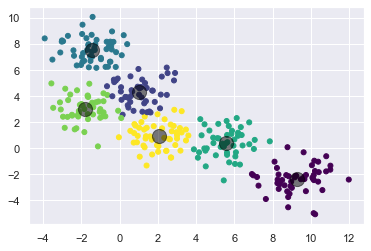

In [58]:
from sklearn.metrics import pairwise_distances_argmin


def find_cluster(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    #print(rng)
    i = rng.permutation(X.shape[0])[:n_clusters]
    #print(i)
    centers = X[i]
    #print(X[i])
    #print(centers)
    while True:
        labels = pairwise_distances_argmin(X, centers)
        #print(labels)
        
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

centers, labels = find_cluster(X, 6)
print(centers)
plt.scatter(X[:,0], X[:,1], c=y_means, s=25, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
        